1. Source: https://www.kaggle.com/datasets/fedesoriano/cirrhosis-prediction-dataset

2. A list of data collected by the mayo clinic that relates to cirrhosis of the liver.

3. stage

4. A person

5. Classification

6. 19

7. 418

8. None

1. ID: unique identifier
2. N_Days: number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986
3. Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)
4. Drug: type of drug D-penicillamine or placebo
5. Age: age in [days]
6. Sex: M (male) or F (female)
7. Ascites: presence of ascites N (No) or Y (Yes)
8. Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes)
9. Spiders: presence of spiders N (No) or Y (Yes)
10. Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)
11. Bilirubin: serum bilirubin in [mg/dl]
12. Cholesterol: serum cholesterol in [mg/dl]
13. Albumin: albumin in [gm/dl]
14. Copper: urine copper in [ug/day]
15. Alk_Phos: alkaline phosphatase in [U/liter]
16. SGOT: SGOT in [U/ml]
17. Triglycerides: triglicerides in [mg/dl]
18. Platelets: platelets per cubic [ml/1000]
19. Prothrombin: prothrombin time in seconds [s]
20. Stage: histologic stage of disease (1, 2, 3, or 4)


In [1]:
#Imports
import os
os.environ["OMP_NUM_THREADS"] = '1'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (precision_score,recall_score,mean_absolute_error,
                             mean_squared_error,explained_variance_score,
                             max_error,classification_report,ConfusionMatrixDisplay,
                             RocCurveDisplay,r2_score)
from sklearn.preprocessing import (StandardScaler,OrdinalEncoder,OneHotEncoder)
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer,ColumnTransformer,make_column_selector
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('C:/Users/Mikey/Documents/GitHub/dojo-env-setup/Project-2/imports/cirrhosis.csv')

In [3]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [5]:
df.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [6]:
df.isna().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

#Data Cleaing

In [7]:
df.reset_index()

,index,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,...,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,...,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,...,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,2,3,1012,D,D-penicillamine,25594,M,N,N,N,...,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,...,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,4,5,1504,CL,Placebo,13918,F,N,Y,Y,...,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,413,414,681,D,NaN,24472,F,NaN,NaN,NaN,...,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,...,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,...,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,416,417,691,C,NaN,21185,F,NaN,NaN,NaN,...,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [8]:
#Columns to lower case for ease of use.
df.columns=df.columns.str.lower()

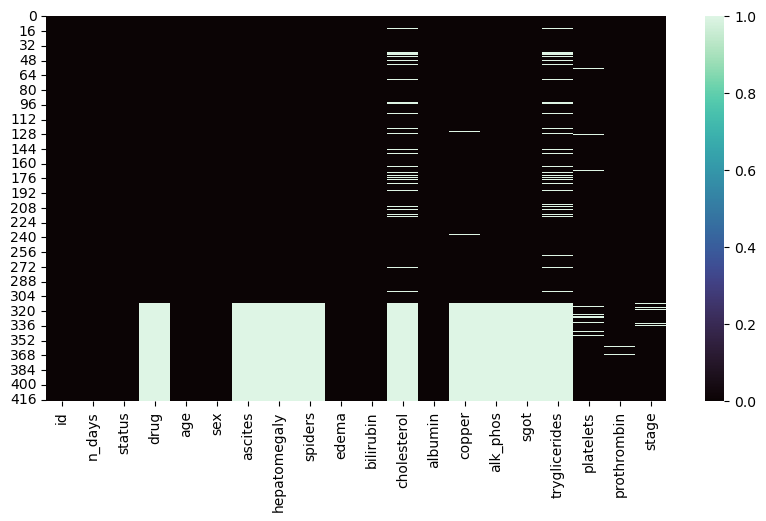

In [9]:
#Visual for missing values
plt.figure(figsize=(10,5))
sns.heatmap(df.isna(),cmap='mako');

In [10]:
#Percentages of missing values.
percent_missing=df.isna().sum()*100/len(df)
print(percent_missing)

id                0.000000
n_days            0.000000
status            0.000000
drug             25.358852
age               0.000000
sex               0.000000
ascites          25.358852
hepatomegaly     25.358852
spiders          25.358852
edema             0.000000
bilirubin         0.000000
cholesterol      32.057416
albumin           0.000000
copper           25.837321
alk_phos         25.358852
sgot             25.358852
tryglicerides    32.535885
platelets         2.631579
prothrombin       0.478469
stage             1.435407
dtype: float64


In [11]:
#Copies for Exploratory data analysis and machine learning
eda_df=df.copy(deep=True)
ml_df=df.copy(deep=True)

In [12]:
#Dropping ID not needed.
eda_df.drop(columns=['id'],inplace=True)
ml_df.drop(columns=['id'],inplace=True)

In [13]:
#Divide age by 365 to convert to years.
eda_df['age']=(eda_df['age']/365)
ml_df['age']=(ml_df['age']/365)
#Float64 to int64
eda_df['age']=eda_df['age'].astype('int64')
ml_df['age']=ml_df['age'].astype('int64')

In [14]:
#Filters for cleaning up missing values.EDA
cat_col=eda_df.select_dtypes(['object']).columns
num_col=eda_df.select_dtypes(['float64','int64']).columns
#ML
cat_col2=ml_df.select_dtypes(['object']).columns
num_col2=ml_df.select_dtypes(['float64','int64']).columns

In [15]:
cat_col2=ml_df.select_dtypes(['object']).columns
num_col2=ml_df.select_dtypes(['float64','int64']).columns

In [16]:
#Dropping stuff under 3% of NaN values.
ml_df.dropna(subset=['platelets'], inplace=True)
eda_df.dropna(subset=['platelets'], inplace=True)
ml_df.dropna(subset=['prothrombin'], inplace=True)
eda_df.dropna(subset=['prothrombin'], inplace=True)
ml_df.dropna(subset=['stage'], inplace=True)
eda_df.dropna(subset=['stage'], inplace=True)

In [17]:
#Percentages of missing values.
percent_missing=ml_df.isna().sum()*100/len(df)
print(percent_missing)

n_days            0.000000
status            0.000000
drug             21.770335
age               0.000000
sex               0.000000
ascites          21.770335
hepatomegaly     21.770335
spiders          21.770335
edema             0.000000
bilirubin         0.000000
cholesterol      28.468900
albumin           0.000000
copper           22.248804
alk_phos         21.770335
sgot             21.770335
tryglicerides    28.947368
platelets         0.000000
prothrombin       0.000000
stage             0.000000
dtype: float64


In [18]:
for n in num_col:
    eda_df[n].fillna(eda_df[n].median(),inplace=True)
    
for m in cat_col:
    eda_df[m].fillna(eda_df[m].mode().values[0],inplace=True)
    
print(eda_df.isna().sum())

n_days           0
status           0
drug             0
age              0
sex              0
ascites          0
hepatomegaly     0
spiders          0
edema            0
bilirubin        0
cholesterol      0
albumin          0
copper           0
alk_phos         0
sgot             0
tryglicerides    0
platelets        0
prothrombin      0
stage            0
dtype: int64


In [19]:
for n in num_col2:
    ml_df[n].fillna(ml_df[n].median(),inplace=True)
    
for m in cat_col2:
    ml_df[m].fillna(ml_df[m].mode().values[0],inplace=True)

print(ml_df.isna().sum())

n_days           0
status           0
drug             0
age              0
sex              0
ascites          0
hepatomegaly     0
spiders          0
edema            0
bilirubin        0
cholesterol      0
albumin          0
copper           0
alk_phos         0
sgot             0
tryglicerides    0
platelets        0
prothrombin      0
stage            0
dtype: int64


In [20]:
for column in ml_df.columns:
    value_counts = ml_df[column].value_counts()
    print(f"Value counts for column '{column}':\n{value_counts}\n")

Value counts for column 'n_days':
2224    2
2563    2
3445    2
597     2
1170    2
       ..
3150    1
3149    1
2796    1
2944    1
976     1
Name: n_days, Length: 381, dtype: int64

Value counts for column 'status':
C     224
D     150
CL     25
Name: status, dtype: int64

Value counts for column 'drug':
D-penicillamine    247
Placebo            152
Name: drug, dtype: int64

Value counts for column 'age':
52    23
56    18
48    16
44    15
41    15
62    14
46    14
51    14
55    13
53    13
54    12
58    11
61    11
50    11
49    11
42    11
40    11
38    11
67    10
33    10
35    10
45     9
43     9
59     8
47     8
36     7
37     7
64     7
63     7
57     6
60     6
70     6
34     5
69     5
32     5
39     5
65     4
66     4
68     3
30     3
31     2
28     1
71     1
76     1
75     1
29     1
72     1
78     1
74     1
26     1
Name: age, dtype: int64

Value counts for column 'sex':
F    356
M     43
Name: sex, dtype: int64

Value counts for column 'ascites':
N   

In [21]:
#Encoding values for ML
#Class the encoder
encoder=LabelEncoder()
#List of columns to fix.
encoder_cols=['stage','edema','spiders','hepatomegaly','ascites','sex','drug']
for col in encoder_cols:
    ml_df[col]=encoder.fit_transform(ml_df[col])

#Exploritory data analysis visualizations

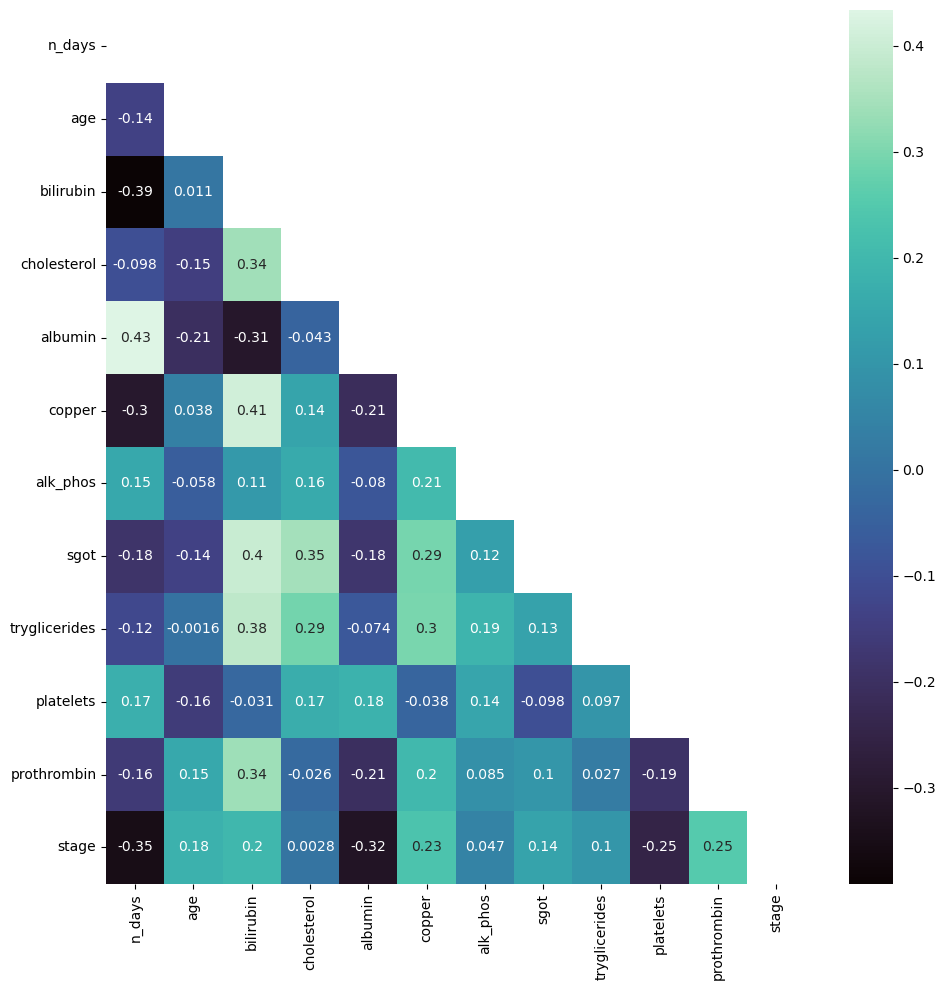

In [22]:
#Heat Map
corr=eda_df.corr()
mask=np.triu(np.ones_like(corr))
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap='mako',mask=mask)
plt.tight_layout();

# Insights from heatmap we can see a few different things
## Positive Correlations
* n_days and albumin
* bilirubin correlates to prothrombin, triglycerides, sgot,copper, cholesterol
* cholesterol and sgot
* copper and sgot

## Negative Correlations
* n_days has a negative correlation with stage, copper, and bilirubin
* bilirubin and albumin
* albumin and stage

### These insights could help us make some final predictions.

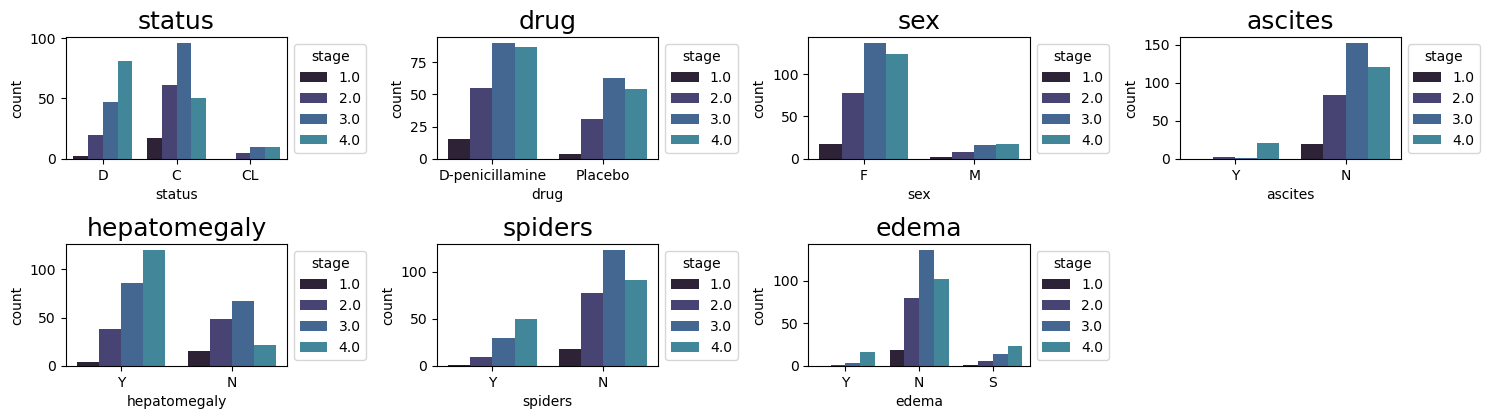

In [23]:
title2=cat_col[:].tolist()
plt.figure(figsize=(15,8))
for i, variable in enumerate(cat_col[:]):
    plt.subplot(4,4,i+1)
    sns.set_palette('mako')
    sns.countplot(x=eda_df[variable],hue='stage',data=eda_df)
    plt.tight_layout()
    plt.title(title2[i],size=18)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1),title='stage')

#Identify Outliers

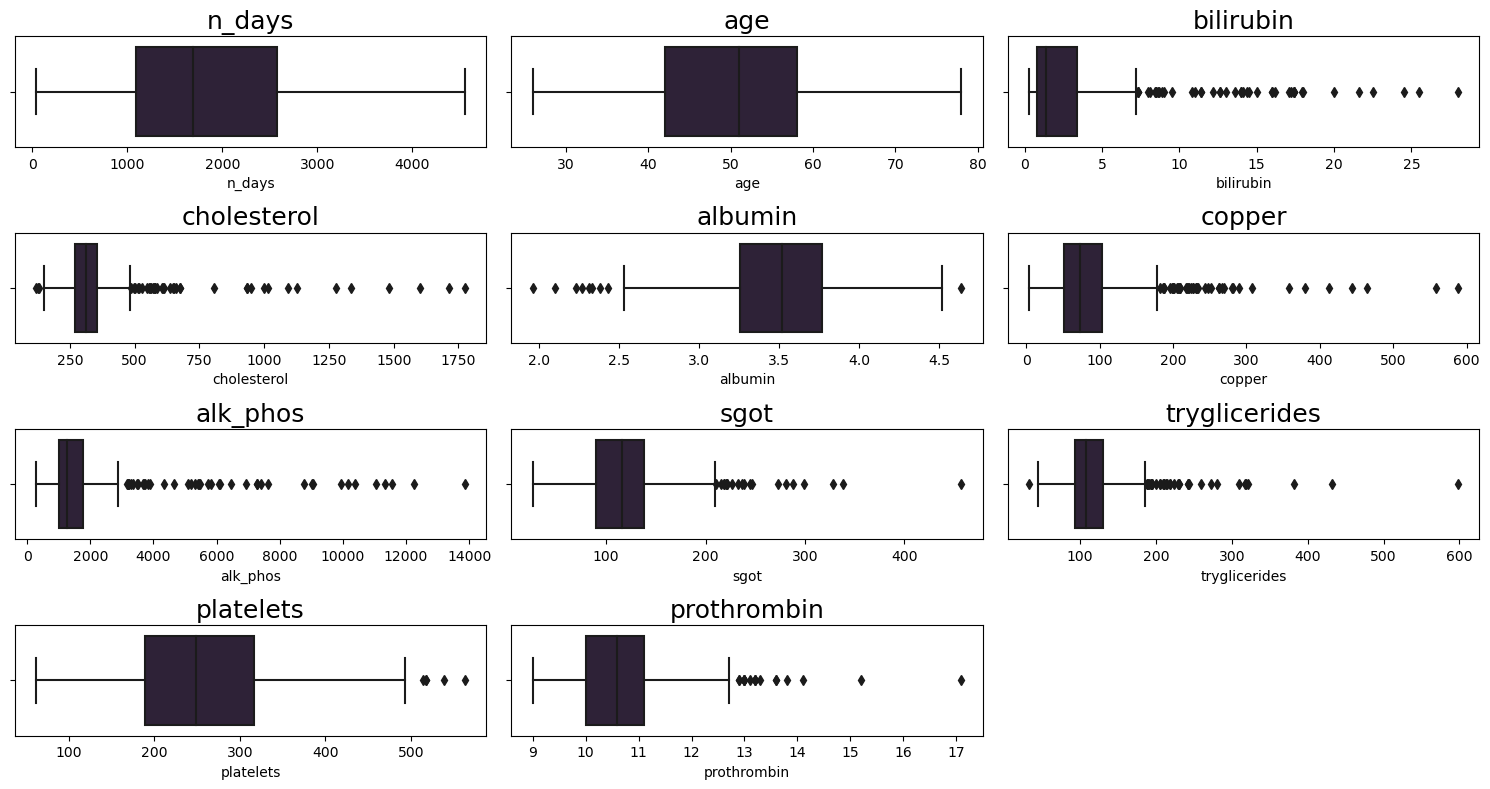

In [24]:
title=num_col[:-1].tolist()
plt.figure(figsize=(15,8))
for i, variable in enumerate(num_col[:-1]):
    plt.subplot(4,3,i+1)
    sns.set_palette('mako')
    sns.boxplot(x=eda_df[variable],data=eda_df,orient="v")
    plt.tight_layout()
    plt.title(title[i],size = 18)

In [25]:
#Dropping due to outliers, tryglicerides had 30% missing data.
ml_df.drop(columns=['cholesterol','tryglicerides','alk_phos'],inplace=True)

#Outliers May Include

*   Bilirubin
*   Cholesterol
*   Albumin
*   Copper
*   Alk_phos
*   Sgot
*   Tryglicerides
*   Platelets
*   Prothrombin



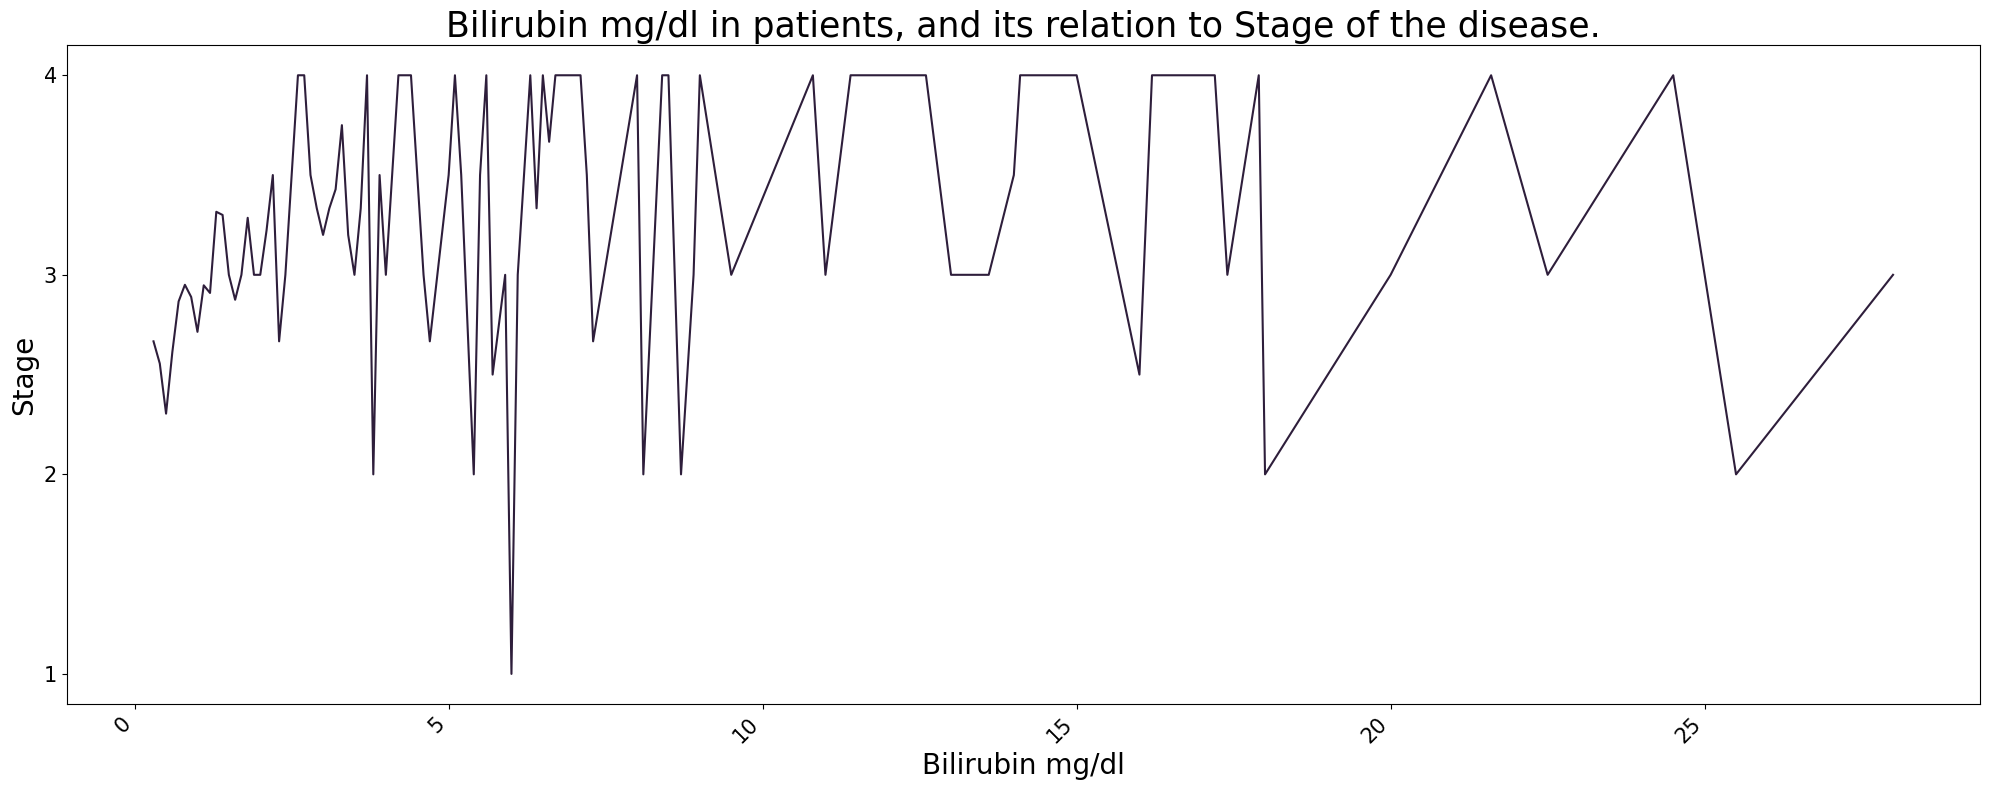

In [26]:
plt.figure(figsize=(20,8))
ax=sns.lineplot(data=eda_df,x='bilirubin',y='stage',ci=None)
ax.set_title('Bilirubin mg/dl in patients, and its relation to Stage of the disease.',fontsize=25)
ax.set_xlabel('Bilirubin mg/dl',fontsize=20)
ax.set_ylabel('Stage',fontsize=20)
ax.set_yticks((1,2,3,4))
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right',fontsize=15)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=15)
plt.tight_layout();

### This line plot shows us that when Bilirubin is above 7~mg/dl patients are at stage 2 or above of the disease 

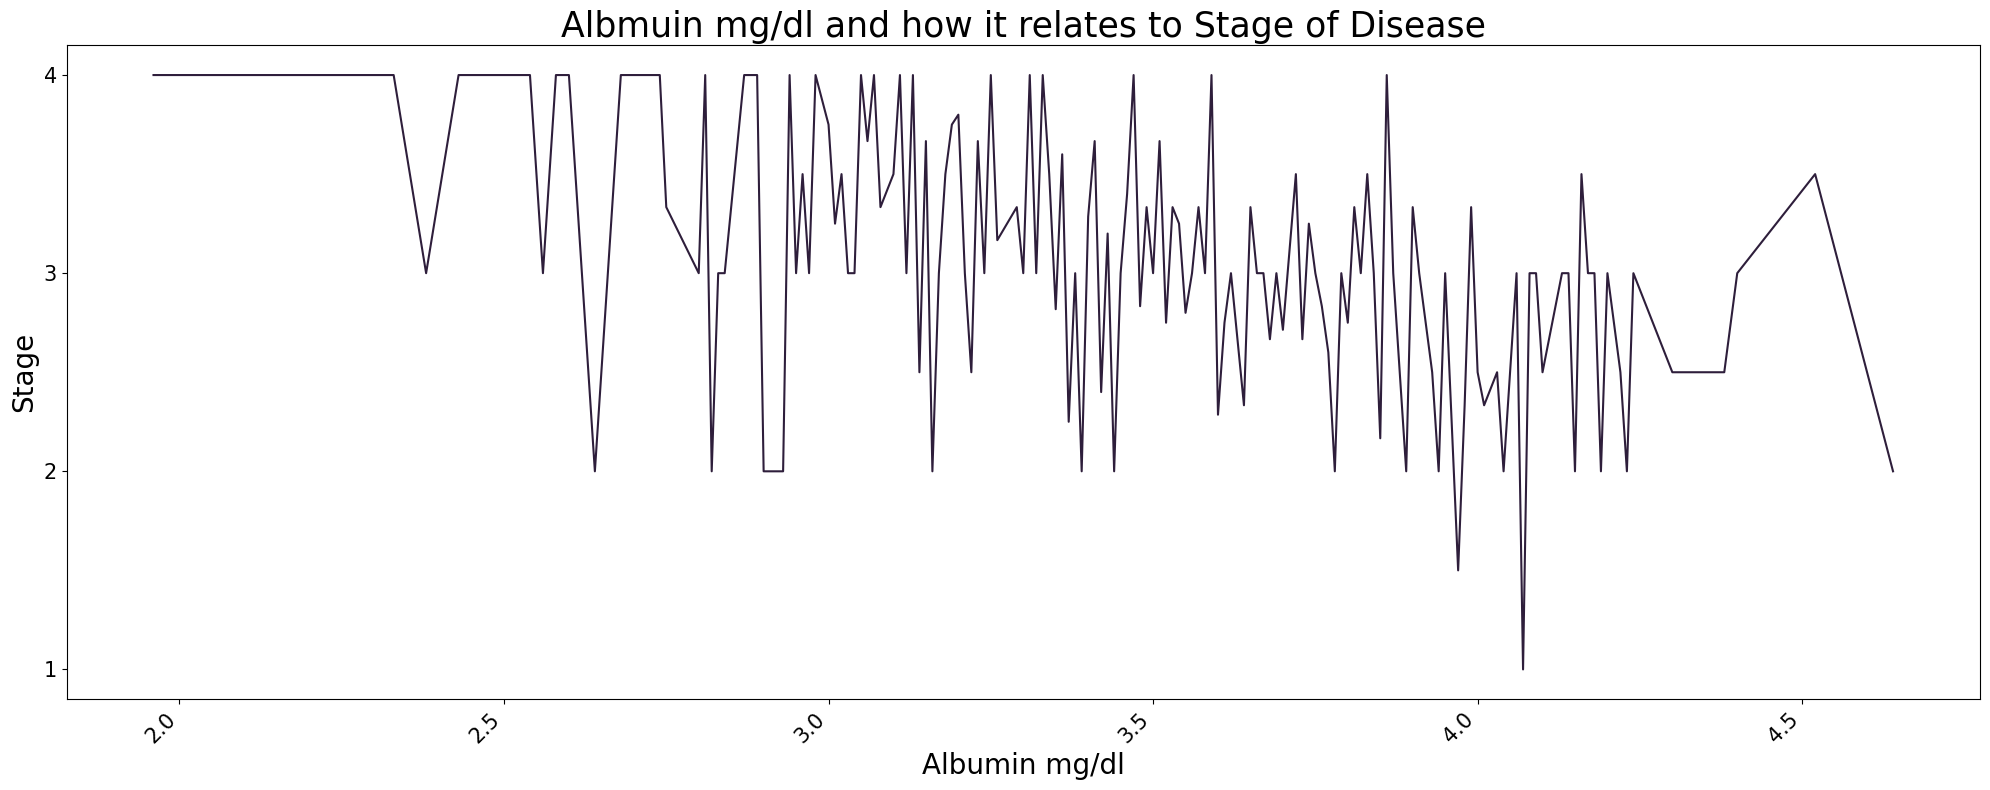

In [27]:
plt.figure(figsize=(20,8))
ax=sns.lineplot(data=eda_df,x='albumin',y='stage',ci=None)
ax.set_title('Albmuin mg/dl and how it relates to Stage of Disease',fontsize=25)
ax.set_xlabel('Albumin mg/dl',fontsize=20)
ax.set_ylabel('Stage',fontsize=20)
ax.set_yticks((1,2,3,4))
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right',fontsize=15)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=15)
plt.tight_layout();

### In this lineplot we can see that after 2.5 mg/dl or lower is found in the blood of Albumin we see many if not all patients at stage 3-4 of the disease.

# Models

In [28]:
#Create a method to evalute with.
def eval_regression(y_true, y_pred, name='model'):
  mae=mean_absolute_error(y_true,y_pred)
  mse=mean_squared_error(y_true,y_pred)
  rmse=np.sqrt(mse)
  r2=r2_score(y_true,y_pred)

  print(f'{name} Scores')
  print(f'MAE: {mae:,.4f} \nMSE: {mse:,.4f} \nRMSE: {rmse:,.4f} \nR2: {r2:.4f}\n')

In [29]:
# Dropping status and n_days as they are not needed for training.
X=ml_df.drop(columns=['stage','status','n_days'])
y=ml_df['stage']

In [30]:
#Scaler
scaler=StandardScaler()
ohe=OneHotEncoder()
#Selector
num_selector=make_column_selector(dtype_include='number')
cat_selector=make_column_selector(dtype_include='object')
#NumPipe
num_pipe=make_pipeline(scaler)
#Preprocessor pipeline
preprocessor=make_column_transformer((num_pipe, num_selector),(ohe, cat_selector))
#PCA transformer
pca=PCA(n_components=2)
# Preprocess the entire dataset
X_preprocessed=preprocessor.fit_transform(X)
# Split preprocessed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y,random_state=42)

# K-Nearest Neighbors Regressor

In [31]:
#KNN class
knn_=KNeighborsRegressor()

In [32]:
#KNN Pipe
knn=make_pipeline(scaler,knn_)
#Fit
knn.fit(X_train, y_train)
#Predict
knn_test=knn.predict(X_test)
knn_train=knn.predict(X_train)
#Evaluate
eval_regression(y_test,knn_test,name='K-Nearest Neighbors w/o PCA Test Scores')
eval_regression(y_train,knn_train,name='K-Nearest Neighbors w/o PCA Train Scores')

K-Nearest Neighbors w/o PCA Test Scores Scores
MAE: 0.6480 
MSE: 0.6376 
RMSE: 0.7985 
R2: 0.1666

K-Nearest Neighbors w/o PCA Train Scores Scores
MAE: 0.5365 
MSE: 0.4618 
RMSE: 0.6796 
R2: 0.3881



In [33]:
knn.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsregressor', KNeighborsRegressor())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsregressor': KNeighborsRegressor(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsregressor__algorithm': 'auto',
 'kneighborsregressor__leaf_size': 30,
 'kneighborsregressor__metric': 'minkowski',
 'kneighborsregressor__metric_params': None,
 'kneighborsregressor__n_jobs': None,
 'kneighborsregressor__n_neighbors': 5,
 'kneighborsregressor__p': 2,
 'kneighborsregressor__weights': 'uniform'}

In [34]:
params={'kneighborsregressor__n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
        'kneighborsregressor__weights':['uniform','distance'],
        'kneighborsregressor__metric':['minkowski','euclidean','manhattan']}

In [35]:
#GridSearch
gridsearcherknn=GridSearchCV(knn,params)
#Gridsearch Fit
gridsearcherknn.fit(X_train,y_train)
#Print best parameters and save them.
print(gridsearcherknn.best_params_)
gridbest_paramsknn=gridsearcherknn.best_estimator_

{'kneighborsregressor__metric': 'minkowski', 'kneighborsregressor__n_neighbors': 15, 'kneighborsregressor__weights': 'uniform'}


In [36]:
#Fit
gridbest_paramsknn.fit(X_train,y_train)
#Predict on best parameters
bestknn=gridbest_paramsknn.predict(X_test)
bestknn_train=gridbest_paramsknn.predict(X_train)
#Evaluate
eval_regression(y_test,bestknn,name='K-Nearest Neighbors w/o PCA Test Scores')
eval_regression(y_train,bestknn_train,name='K-Nearest Neighbors w/o PCA Train Scores')

K-Nearest Neighbors w/o PCA Test Scores Scores
MAE: 0.6293 
MSE: 0.5836 
RMSE: 0.7640 
R2: 0.2372

K-Nearest Neighbors w/o PCA Train Scores Scores
MAE: 0.5951 
MSE: 0.5393 
RMSE: 0.7344 
R2: 0.2854



# K-Nearest Neighbors w/ PCA

In [37]:
#KNN with PCA
knn_with_pca=make_pipeline(pca,knn)

In [38]:
#KNN w/ PCA Pipe
knn_with_pca.fit(X_train, y_train)
#KNNPCA Predict
knn_pca_test=knn_with_pca.predict(X_test)
knn_pca_train=knn_with_pca.predict(X_train)
#Evaluate
eval_regression(y_test,knn_pca_test,name='K-Nearest Neighbors w/ PCA Test Scores')
eval_regression(y_train,knn_pca_train,name='K-Nearest Neighbors w/ PCA Train Scores')

K-Nearest Neighbors w/ PCA Test Scores Scores
MAE: 0.6660 
MSE: 0.7460 
RMSE: 0.8637 
R2: 0.0250

K-Nearest Neighbors w/ PCA Train Scores Scores
MAE: 0.5244 
MSE: 0.4503 
RMSE: 0.6710 
R2: 0.4034



In [39]:
knn_with_pca.get_params()

{'memory': None,
 'steps': [('pca', PCA(n_components=2)),
  ('pipeline',
   Pipeline(steps=[('standardscaler', StandardScaler()),
                   ('kneighborsregressor', KNeighborsRegressor())]))],
 'verbose': False,
 'pca': PCA(n_components=2),
 'pipeline': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('kneighborsregressor', KNeighborsRegressor())]),
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': 2,
 'pca__n_oversamples': 10,
 'pca__power_iteration_normalizer': 'auto',
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'pipeline__memory': None,
 'pipeline__steps': [('standardscaler', StandardScaler()),
  ('kneighborsregressor', KNeighborsRegressor())],
 'pipeline__verbose': False,
 'pipeline__standardscaler': StandardScaler(),
 'pipeline__kneighborsregressor': KNeighborsRegressor(),
 'pipeline__standardscaler__copy': True,
 'pipeline__standardscaler__with_mean': True,
 'pipeline__sta

In [40]:
params={'pipeline__kneighborsregressor__n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
        'pipeline__kneighborsregressor__weights':['uniform','distance'],
        'pipeline__kneighborsregressor__metric':['minkowski','euclidean','manhattan'],
        'pca__n_components': [2, 4]}

In [41]:
#GridSearch
gridsearcherknn_with_pca=GridSearchCV(estimator=knn_with_pca,param_grid=params)
#Gridsearch Fit
gridsearcherknn_with_pca=GridSearchCV(estimator=knn_with_pca,param_grid=params)
gridsearcherknn_with_pca.fit(X_train, y_train)
#Print best parameters and save them.
print(gridsearcherknn_with_pca.best_params_)
gridbest_paramsknn_with_pca=gridsearcherknn_with_pca.best_estimator_

{'pca__n_components': 2, 'pipeline__kneighborsregressor__metric': 'minkowski', 'pipeline__kneighborsregressor__n_neighbors': 12, 'pipeline__kneighborsregressor__weights': 'uniform'}


In [42]:
#Fit
gridbest_paramsknn_with_pca.fit(X_train,y_train)
#Predict on best parameters
bestknn=gridbest_paramsknn_with_pca.predict(X_test)
bestknn_train=gridbest_paramsknn_with_pca.predict(X_train)
#Evaluate
eval_regression(y_test,bestknn,name='K-Nearest Neighbors w/ PCA Test Scores')
eval_regression(y_train,bestknn_train,name='K-Nearest Neighbors w/ PCA Train Scores')

K-Nearest Neighbors w/ PCA Test Scores Scores
MAE: 0.6367 
MSE: 0.6579 
RMSE: 0.8111 
R2: 0.1401

K-Nearest Neighbors w/ PCA Train Scores Scores
MAE: 0.5817 
MSE: 0.5097 
RMSE: 0.7140 
R2: 0.3246



# Random Forest Regressor

In [43]:
#Random Forest Regressor
rfr_=RandomForestRegressor()

In [44]:
#RFR Pipe
rfr=make_pipeline(scaler,rfr_)
#Fit
rfr.fit(X_train,y_train)
#Predict
rfr_test=rfr.predict(X_test)
rfr_train=rfr.predict(X_train)
#Evaluate
eval_regression(y_test,rfr_test,name='Random Forest Regression w/o PCA Test Scores')
eval_regression(y_train,rfr_train,name='Random Forest Regression w/o PCA Train Scores')

Random Forest Regression w/o PCA Test Scores Scores
MAE: 0.6103 
MSE: 0.5699 
RMSE: 0.7549 
R2: 0.2551

Random Forest Regression w/o PCA Train Scores Scores
MAE: 0.2373 
MSE: 0.0864 
RMSE: 0.2939 
R2: 0.8855



In [45]:
rfr.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('randomforestregressor', RandomForestRegressor())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'randomforestregressor': RandomForestRegressor(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'randomforestregressor__bootstrap': True,
 'randomforestregressor__ccp_alpha': 0.0,
 'randomforestregressor__criterion': 'squared_error',
 'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 1.0,
 'randomforestregressor__max_leaf_nodes': None,
 'randomforestregressor__max_samples': None,
 'randomforestregressor__min_impurity_decrease': 0.0,
 'randomforestregressor__min_samples_leaf': 1,
 'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__min_weight_fraction_leaf': 0.0,
 'randomforestregressor__n_estimators': 100,
 'randomforestregressor__n_jobs': None,
 'randomforestregressor__oob_score': False,
 'randomforestr

In [46]:
params={'randomforestregressor__max_depth':[20,30,40,50],
        'randomforestregressor__max_features':['log2','auto'],
        'randomforestregressor__n_estimators':[25,50,150,200]}

In [47]:
#GridSearch
gridsearcher_rfr=GridSearchCV(rfr,params)
#Gridsearch Fit
gridsearcher_rfr.fit(X_train,y_train)
#Print best parameters and save them.
print(gridsearcher_rfr.best_params_)
gridbest_params_rfr=gridsearcher_rfr.best_estimator_

{'randomforestregressor__max_depth': 40, 'randomforestregressor__max_features': 'log2', 'randomforestregressor__n_estimators': 150}


In [48]:
#Fit
gridbest_params_rfr.fit(X_train,y_train)
#Predict on best parameters
best_rfr=gridbest_params_rfr.predict(X_test)
best_rfr_train=gridbest_params_rfr.predict(X_train)
#Evaluate
eval_regression(y_test,best_rfr,name='Random Forest Regression w/o PCA Test Scores')
eval_regression(y_train,best_rfr_train,name='Random Forest Regression w/o PCA Train Scores')

Random Forest Regression w/o PCA Test Scores Scores
MAE: 0.5984 
MSE: 0.5313 
RMSE: 0.7289 
R2: 0.3056

Random Forest Regression w/o PCA Train Scores Scores
MAE: 0.2366 
MSE: 0.0834 
RMSE: 0.2887 
R2: 0.8896



# Random Forest Regressor with PCA

In [49]:
#RFRPCA Class
rfr_pca=make_pipeline(pca,rfr)

In [50]:
#Fit
rfr_pca.fit(X_train,y_train)
#Predict
rfr_test=rfr_pca.predict(X_test)
rfr_train=rfr_pca.predict(X_train)
#Evaluate
eval_regression(y_test,rfr_test,name='Random Forest Regression w/o PCA Test Scores')
eval_regression(y_train,rfr_train,name='Random Forest Regression w/o PCA Train Scores')

Random Forest Regression w/o PCA Test Scores Scores
MAE: 0.6503 
MSE: 0.7286 
RMSE: 0.8536 
R2: 0.0477

Random Forest Regression w/o PCA Train Scores Scores
MAE: 0.2534 
MSE: 0.1000 
RMSE: 0.3162 
R2: 0.8675



In [51]:
rfr_pca.get_params()

{'memory': None,
 'steps': [('pca', PCA(n_components=2)),
  ('pipeline',
   Pipeline(steps=[('standardscaler', StandardScaler()),
                   ('randomforestregressor', RandomForestRegressor())]))],
 'verbose': False,
 'pca': PCA(n_components=2),
 'pipeline': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestregressor', RandomForestRegressor())]),
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': 2,
 'pca__n_oversamples': 10,
 'pca__power_iteration_normalizer': 'auto',
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'pipeline__memory': None,
 'pipeline__steps': [('standardscaler', StandardScaler()),
  ('randomforestregressor', RandomForestRegressor())],
 'pipeline__verbose': False,
 'pipeline__standardscaler': StandardScaler(),
 'pipeline__randomforestregressor': RandomForestRegressor(),
 'pipeline__standardscaler__copy': True,
 'pipeline__standardscaler__with_mean': True,

In [52]:
params={'pipeline__randomforestregressor__max_depth':[20,30,40,50],
        'pipeline__randomforestregressor__max_features':['log2','auto'],
        'pipeline__randomforestregressor__n_estimators':[25,50,150,200],
        'pca__n_components': [2, 4]}

In [53]:
#GridSearch
gridsearcherrfr_pca=GridSearchCV(estimator=rfr_pca,param_grid=params)
#Gridsearch Fit
gridsearcherrfr_pca.fit(X_train,y_train)
#Print best parameters and save them.
print(gridsearcherrfr_pca.best_params_)
gridbest_paramsrfr_pca=gridsearcherrfr_pca.best_estimator_

{'pca__n_components': 4, 'pipeline__randomforestregressor__max_depth': 30, 'pipeline__randomforestregressor__max_features': 'log2', 'pipeline__randomforestregressor__n_estimators': 200}


In [54]:
#Fit
gridbest_paramsrfr_pca.fit(X_train,y_train)
#Predict on best parameters
bestrfr_pca=gridbest_paramsrfr_pca.predict(X_test)
bestrfr_pca_train=gridbest_paramsrfr_pca.predict(X_train)
#Evaluate
eval_regression(y_test,bestrfr_pca,name='Random Forest Regression w/ PCA Test Scores')
eval_regression(y_train,bestrfr_pca_train,name='Random Forest Regression w/ PCA Train Scores')

Random Forest Regression w/ PCA Test Scores Scores
MAE: 0.6224 
MSE: 0.5841 
RMSE: 0.7643 
R2: 0.2365

Random Forest Regression w/ PCA Train Scores Scores
MAE: 0.2456 
MSE: 0.0938 
RMSE: 0.3062 
R2: 0.8758



# SVR

In [55]:
#Define svr
svr_=SVR()

In [56]:
#Make Pipeline
svr=make_pipeline(scaler,svr_)
#Fit
svr.fit(X_train,y_train)
#Predict
svr_test=svr.predict(X_test)
svr_train=svr.predict(X_train)
#Evaluate
eval_regression(y_test,svr_test,name='SVR w/o PCA Test Scores')
eval_regression(y_train,svr_train,name='SVR w/o PCA Train Scores')

SVR w/o PCA Test Scores Scores
MAE: 0.6107 
MSE: 0.5989 
RMSE: 0.7739 
R2: 0.2173

SVR w/o PCA Train Scores Scores
MAE: 0.4317 
MSE: 0.3714 
RMSE: 0.6094 
R2: 0.5080



In [57]:
#Get Params to try.
svr.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()), ('svr', SVR())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'svr': SVR(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'svr__C': 1.0,
 'svr__cache_size': 200,
 'svr__coef0': 0.0,
 'svr__degree': 3,
 'svr__epsilon': 0.1,
 'svr__gamma': 'scale',
 'svr__kernel': 'rbf',
 'svr__max_iter': -1,
 'svr__shrinking': True,
 'svr__tol': 0.001,
 'svr__verbose': False}

In [58]:
#Define params.
params = {'svr__C': [0.1, 1, 10],
          'svr__kernel': ['linear', 'rbf'],
          'svr__epsilon': [0.1, 0.01, 0.001]}

In [59]:
#GridSearch
gridsearcher_svr=GridSearchCV(svr,params)
#Gridsearch Fit
gridsearcher_svr.fit(X_train,y_train)
#Print best parameters and save them.
print(gridsearcher_svr.best_params_)
gridbest_params_svr=gridsearcher_svr.best_estimator_

{'svr__C': 0.1, 'svr__epsilon': 0.1, 'svr__kernel': 'linear'}


In [60]:
#Fit
gridbest_params_svr.fit(X_train,y_train);
#Predict on best parameters
best_svr=gridbest_params_svr.predict(X_test)
best_svr_train=gridbest_params_svr.predict(X_train)
#Evaluate
eval_regression(y_test,best_svr,name='SVR w/o PCA Test Scores')
eval_regression(y_train,best_svr_train,name='SVR w/o PCA Train Scores')

SVR w/o PCA Test Scores Scores
MAE: 0.6115 
MSE: 0.5898 
RMSE: 0.7680 
R2: 0.2291

SVR w/o PCA Train Scores Scores
MAE: 0.5908 
MSE: 0.5659 
RMSE: 0.7523 
R2: 0.2502



# SVR w/ PCA

In [61]:
#add pca to pipeline
svr_pca=make_pipeline(pca,svr)
#Fit it
svr_pca.fit(X_train,y_train)
#Predict
svr_test=svr_pca.predict(X_test)
svr_train=svr_pca.predict(X_train)
#Evaluate
eval_regression(y_test,svr_test,name='SVR w/ PCA Test Scores')
eval_regression(y_train,svr_train,name='SVR w/ PCA Train Scores')

SVR w/ PCA Test Scores Scores
MAE: 0.6020 
MSE: 0.6465 
RMSE: 0.8040 
R2: 0.1550

SVR w/ PCA Train Scores Scores
MAE: 0.5723 
MSE: 0.5782 
RMSE: 0.7604 
R2: 0.2339



In [62]:
svr_pca.get_params()

{'memory': None,
 'steps': [('pca', PCA(n_components=2)),
  ('pipeline',
   Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())]))],
 'verbose': False,
 'pca': PCA(n_components=2),
 'pipeline': Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())]),
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': 2,
 'pca__n_oversamples': 10,
 'pca__power_iteration_normalizer': 'auto',
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'pipeline__memory': None,
 'pipeline__steps': [('standardscaler', StandardScaler()), ('svr', SVR())],
 'pipeline__verbose': False,
 'pipeline__standardscaler': StandardScaler(),
 'pipeline__svr': SVR(),
 'pipeline__standardscaler__copy': True,
 'pipeline__standardscaler__with_mean': True,
 'pipeline__standardscaler__with_std': True,
 'pipeline__svr__C': 1.0,
 'pipeline__svr__cache_size': 200,
 'pipeline__svr__coef0': 0.0,
 'pipeline__svr__degree': 3,
 'pipeline__svr_

In [63]:
#Define params.
params = {'pipeline__svr__C': [0.1, 1, 10],
          'pipeline__svr__kernel': ['linear', 'rbf'],
          'pipeline__svr__epsilon': [0.1, 0.01, 0.001],
          'pca__n_components':[2,4,6,8,10]}

In [64]:
#GridSearch
gridsearcher_svr_pca=GridSearchCV(svr_pca,params)
#Gridsearch Fit
gridsearcher_svr_pca.fit(X_train,y_train)
#Print best parameters and save them.
print(gridsearcher_svr_pca.best_params_)
gridbest_params_svr_pca=gridsearcher_svr_pca.best_estimator_

{'pca__n_components': 8, 'pipeline__svr__C': 0.1, 'pipeline__svr__epsilon': 0.1, 'pipeline__svr__kernel': 'linear'}


In [65]:
#Fit
gridbest_params_svr_pca.fit(X_train,y_train);
#Predict on best parameters
best_svr_pca=gridbest_params_svr_pca.predict(X_test)
best_svr_pca_train=gridbest_params_svr_pca.predict(X_train)
#Evaluate
eval_regression(y_test,best_svr_pca,name='SVR w/ PCA Test Scores')
eval_regression(y_train,best_svr_pca_train,name='SVR w/ PCA Train Scores')

SVR w/ PCA Test Scores Scores
MAE: 0.6051 
MSE: 0.5775 
RMSE: 0.7599 
R2: 0.2452

SVR w/ PCA Train Scores Scores
MAE: 0.5987 
MSE: 0.5772 
RMSE: 0.7598 
R2: 0.2352



# Linear Regression

In [66]:
#Linear Regression Class
lr_=LinearRegression()

In [67]:
#Pipeline
lr=make_pipeline(scaler,lr_)
#Fit
lr.fit(X_train,y_train)
#Predict
lr_test=lr.predict(X_test)
lr_train=lr.predict(X_train)
#Evaluate
eval_regression(y_test,lr_test,name='Linear Regression w/o PCA Test Scores')
eval_regression(y_train,lr_train,name='Linear Regression w/o PCA Train Scores')

Linear Regression w/o PCA Test Scores Scores
MAE: 0.5970 
MSE: 0.5532 
RMSE: 0.7438 
R2: 0.2770

Linear Regression w/o PCA Train Scores Scores
MAE: 0.6025 
MSE: 0.5479 
RMSE: 0.7402 
R2: 0.2741



In [68]:
lr.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('linearregression', LinearRegression())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'linearregression': LinearRegression(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'linearregression__copy_X': True,
 'linearregression__fit_intercept': True,
 'linearregression__n_jobs': None,
 'linearregression__positive': False}

In [69]:
params={'linearregression__fit_intercept':[True,False],
        'linearregression__copy_X':[True,False],
        'linearregression__n_jobs':[-1,1,2]}

In [70]:
#GridSearch
gridsearcher_lr=GridSearchCV(lr,params)
#Gridsearch Fit
gridsearcher_lr.fit(X_train,y_train)
#Print best parameters and save them.
print(gridsearcher_lr.best_params_)
gridbest_params_lr=gridsearcher_lr.best_estimator_

{'linearregression__copy_X': True, 'linearregression__fit_intercept': True, 'linearregression__n_jobs': -1}


In [71]:
#Fit
gridbest_params_lr.fit(X_train,y_train);
#Predict on best parameters
best_lr=gridbest_params_lr.predict(X_test)
best_lr_train=gridbest_params_lr.predict(X_train)
#Evaluate
eval_regression(y_test,best_lr,name='Decision Tree Regression w/o PCA Test Scores')
eval_regression(y_train,best_lr_train,name='Decision Tree Regression w/o PCA Train Scores')

Decision Tree Regression w/o PCA Test Scores Scores
MAE: 0.5970 
MSE: 0.5532 
RMSE: 0.7438 
R2: 0.2770

Decision Tree Regression w/o PCA Train Scores Scores
MAE: 0.6025 
MSE: 0.5479 
RMSE: 0.7402 
R2: 0.2741

